## Imports

In [142]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np
# Import scikit-learn module for module building
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


 # Import scikit-Learn module for train and test data
from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Import modele for classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier



from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

In [252]:
# Import XGB classifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

### Loading Dataset

In [3]:
#Loading the dataset
df_cust = pd.read_csv('C:/Users/Gayathri/Desktop/Springboard/BankChurners.csv')

In [4]:
# Dropping the irrelavent column
df_cust.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      inplace= True)

In [5]:
# Dropping the irrelavent column
df_cust.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
            inplace= True)

In [6]:
# Just taking a look at few columns

df_cust.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


The dataset didnt have any missing values


In [7]:
df_cust.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
# Find the percentage of record in each category

df_cust['Attrition_Flag'].value_counts()/10127 * 100



Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

Almost 84% of the record belongs to Existing customer category and 16% belongs to the Attrited customer category. We have imbalanced class here.

### Converting Target to 0 & 1

In [9]:
df_cust.replace('Existing Customer',0,inplace=True)
df_cust.replace('Attrited Customer',1,inplace=True)

In [10]:
features = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

In [10]:
df_cust.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Creating dummies for catogerical columns

In [11]:
df_onehot = df_cust.copy()

In [12]:
for col in features:
    df_onehot = pd.get_dummies(df_onehot,columns=[col], prefix = col)

In [13]:
df_onehot.head(4)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,0,0,0,0,1,0,1,0,0,0
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0


In [14]:
df_cust = df_onehot.copy()

In [15]:
df_cust.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,0,0,0,0,1,0,1,0,0,0
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
4,709106358,0,40,3,21,5,1,0,4716.0,0,...,0,0,1,0,0,0,1,0,0,0


In [16]:
## Checing the datatype
df_cust.dtypes

CLIENTNUM                           int64
Attrition_Flag                      int64
Customer_Age                        int64
Dependent_count                     int64
Months_on_book                      int64
Total_Relationship_Count            int64
Months_Inactive_12_mon              int64
Contacts_Count_12_mon               int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Gender_F                            uint8
Gender_M                            uint8
Education_Level_College             uint8
Education_Level_Doctorate           uint8
Education_Level_Graduate            uint8
Education_Level_High School         uint8
Education_Level_Post-Graduate       uint8
Education_Level_Uneducated        

In [17]:
cols = ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver']

### Scaling the dataset

In [18]:
scaler = StandardScaler()
scaler.fit(df_cust)
df_cust_scale = scaler.transform(df_cust)
df_cust_scaled = pd.DataFrame(df_cust_scale, columns=cols)

In [19]:
df_cust_scaled.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.802878,-0.437506,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,...,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,0.270611,-0.107644,-0.044484,-0.240794
1,2.156861,-0.437506,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,...,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,0.270611,-0.107644,-0.044484,-0.240794
2,-0.682769,-0.437506,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,...,-0.278101,-0.463363,-0.400859,2.365881,-0.736437,-0.351212,0.270611,-0.107644,-0.044484,-0.240794
3,0.832862,-0.437506,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,...,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,0.270611,-0.107644,-0.044484,-0.240794
4,-0.814896,-0.437506,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,...,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,0.270611,-0.107644,-0.044484,-0.240794


### Spliting the dataset for training and testing 

In [20]:
X = df_cust_scaled.copy()
Y = df_cust[['Attrition_Flag']]

In [83]:
X.drop(columns=['CLIENTNUM','Attrition_Flag'],inplace=True)

In [84]:
#Spliting the dataset into to 70% train and 30% test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state =100)  

In [85]:
Y.value_counts()

Attrition_Flag
0                 8500
1                 1627
dtype: int64

In [86]:
x_train.shape, x_test.shape

((7088, 37), (3039, 37))

In [87]:
y_train.shape, y_test.shape

((7088, 1), (3039, 1))

In [88]:
y_train.value_counts()

Attrition_Flag
0                 5984
1                 1104
dtype: int64

### Imbalacend class dataset ###
    In this dataset we have imbalanced class problem. Almost 84% of the record belongs to Existing customer category and 16%   belongs to the Attrited customer category.     
    ML techniques tend only to predict the majority class, hence, having major misclassification of the minority class in   comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.

#### SMOTE (Synthetic Minority Oversampling Technique) – Oversampling
This is one of the common method for oversampling the minority class. It generates virtual records of the minority class selecting one or more K-nearest neighbore for each example of the minorty class


In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
sm = SMOTE(random_state = 2)

In [91]:
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [92]:
y_train_res.value_counts()

Attrition_Flag
1                 5984
0                 5984
dtype: int64

In [55]:
import warnings
warnings.filterwarnings("ignore")

In [93]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

# your turn
for c in Cs:
    clf = LogisticRegression(C=c)
    score = cv_score(clf,x_train_res,y_train_res)
    print('C :' + str(c) + '    Score :' + str(score))

C :0.001    Score :0.7544233546674878
C :0.1    Score :0.8301289161055584
C :1    Score :0.8320509101141209
C :10    Score :0.8323851836025501
C :100    Score :0.8323851836025501


**Defining a function for Gridsearch**

In [103]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

**Defining a function for classification**

In [98]:
def do_classify(clf, parameters,xtrain,ytrain,xtest,ytest):
    clf = cv_optimize(clf, parameters, xtrain, ytrain)
    clf=clf.fit(xtrain, ytrain)
    training_accuracy = clf.score(xtrain, ytrain)
    test_accuracy = clf.score(xtest, ytest)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    y_pred = clf.predict(xtest)
    pl = confusion_matrix(ytest,y_pred)
    ax = sns.heatmap(pl, annot=True, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    print(classification_report(ytest,y_pred))
    return 

**Logistic Regression**

BEST PARAMS {'C': 0.1}
Accuracy on training data: 0.87
Accuracy on test data:     0.85
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2516
           1       0.53      0.83      0.65       523

    accuracy                           0.85      3039
   macro avg       0.75      0.84      0.78      3039
weighted avg       0.89      0.85      0.86      3039



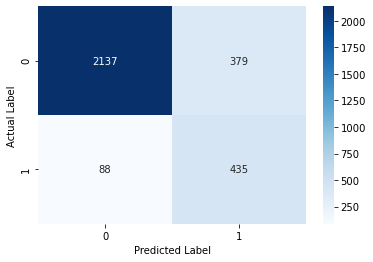

In [99]:
# Funtion call with Logistic Regression
do_classify(LogisticRegression(), {"C": [0.01, 0.1, 1, 10, 100]},x_train_res, y_train_res,x_test,y_test)

In [119]:
# Defining a function for cross validation
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func='accuracy'):
    nfold = 5
    kfold = KFold(n_splits=nfold)
    result = cross_val_score(clf,x,y,cv = kfold,scoring =score_func)
    return result.mean()

**LogtisticRegression  with the best parameters**

In [286]:
c = 0.1
model_l = LogisticRegression(C=c)
model_l.fit(x_train_res, y_train_res)
y_pred_l = model_l.predict(x_test)

accuracy_level = accuracy_score(y_test,y_pred_l)
print(("Accuracy: %.3f%%") % (accuracy_level*100.0))



Accuracy: 84.633%


In [313]:
# accuracy with Cross validation
cv_score(model_l,x_train_res,y_train_res)

0.8301289161055584

In [287]:
# Prediction with the selected model
y_prob_l = model_l.predict_proba(x_test)[:,1]
fpr_l , tpr_l , thresholds = roc_curve(y_test,y_prob)
auc_l = roc_auc_score(y_test,y_pred_l)

In [288]:
#Updating the table with the best model results
result_df = pd.DataFrame(columns=['classifiers', 'Accuracy','AUC'])

result_df=result_df.append({'classifiers':'LogisticRegression','Accuracy': round(accuracy_level*100.0,2),
                                                                                'AUC':auc_l}, ignore_index=True)

**Random Forest**

BEST PARAMS {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 500}
Accuracy on training data: 1.00
Accuracy on test data:     0.95
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2516
           1       0.86      0.85      0.85       523

    accuracy                           0.95      3039
   macro avg       0.91      0.91      0.91      3039
weighted avg       0.95      0.95      0.95      3039



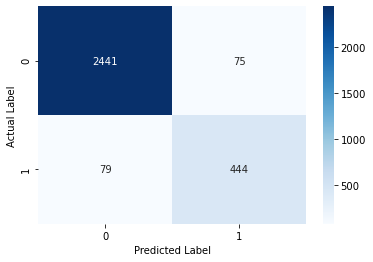

In [222]:
# Setting up the parameters for grid search
param_grid = {'n_estimators':[50,100,500],'max_depth': [2, 4, 8, 15], 'max_features': [None, 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

# Calling  the classify function with the grid param
do_classify(RandomForestClassifier(), param_grid,x_train_res, y_train_res,x_test,y_test)

**RandomForest Model using the best parameters**

In [281]:

model_RF = RandomForestClassifier(n_estimators=500, criterion= 'entropy', max_depth= 15, max_features='sqrt')
model_RF.fit(x_train_res, y_train_res)
y_pred_rf = model_RF.predict(x_test)

accuracy_level_rf = accuracy_score(y_test,y_pred_rf)
print(("Accuracy: %.3f%%") % (accuracy_level_rf*100.0))

Accuracy: 95.393%


In [282]:
# Prediction using best param
y_prob_rf = model_RF.predict_proba(x_test)[:,1]
fpr_rf , tpr_rf , thresholds = roc_curve(y_test,y_prob_rf)

auc_rf = roc_auc_score(y_test,y_pred_rf)

In [316]:
# Accuracy from cross validation
cv_score(model_RF,x_train_res,y_train_res)

0.9701730646437797

**Feature importance from RandomForest**

30


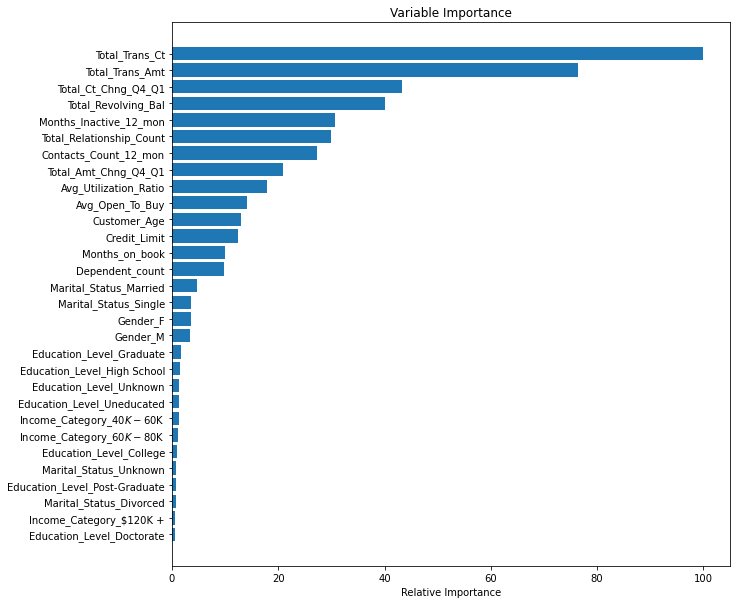

In [283]:

feature_importance = model_RF.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [289]:
#Updating the table with the best model results
result_df=result_df.append({'classifiers':'RandomForest','Accuracy': round(accuracy_level_rf*100.0,2),
                                                                                'AUC':auc_rf}, ignore_index=True)

### Gradiant Boosting Classifier

BEST PARAMS {'learning_rate': 0.5, 'max_depth': 11, 'max_features': 'log2', 'n_estimators': 100}
Accuracy on training data: 1.00
Accuracy on test data:     0.96
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2516
           1       0.92      0.87      0.89       523

    accuracy                           0.96      3039
   macro avg       0.95      0.93      0.94      3039
weighted avg       0.96      0.96      0.96      3039



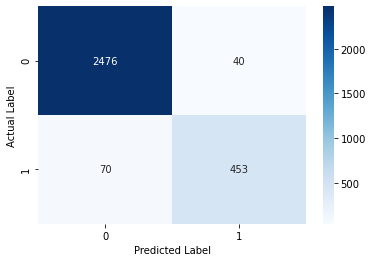

In [221]:

param_grid = {'n_estimators':[50,100,150],'max_depth': [3,5,7,11],'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1],'max_features': [None, 'sqrt', 'log2']}
              
do_classify(GradientBoostingClassifier(), param_grid,x_train_res, y_train_res,x_test,y_test)

**Gradiantboosting with best parameters**

In [290]:
model_GB = GradientBoostingClassifier(learning_rate=0.5,n_estimators=100, max_depth= 11, max_features='log2')
model_GB.fit(x_train_res, y_train_res)
y_pred_gb = model_GB.predict(x_test)

accuracy_level_gb = accuracy_score(y_test,y_pred_gb)
print(("Accuracy: %.3f%%") % (accuracy_level_gb*100.0))

Accuracy: 96.315%


In [291]:
y_prob_gb = model_GB.predict_proba(x_test)[:,1]
fpr_gb , tpr_gb , thresholds = roc_curve(y_test,y_prob_gb)
auc_gb = roc_auc_score(y_test,y_pred_gb)

In [292]:
#Updating the table with the best model results
result_df=result_df.append({'classifiers':'GradientBoosting','Accuracy': round(accuracy_level_gb*100.0,2),
                                                                                'AUC':auc_gb}, ignore_index=True)

**Displaying important features with Gradiant Boosting**

30


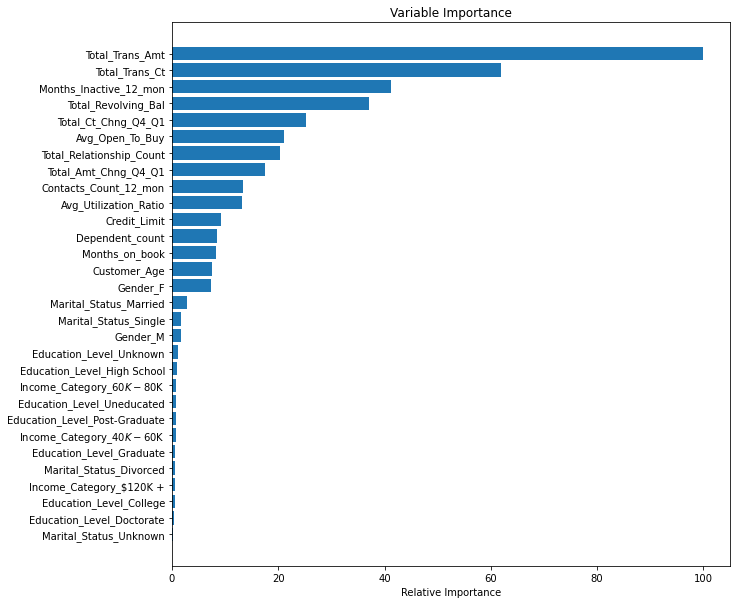

In [293]:
feature_importance = model_GB.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**XGBoost classifier**

In [268]:

param_grid = {'n_estimators':[50,100,150],'max_depth':[3,5,7],
              'learning_rate': [0.001,0.05,0.1,0.2],'reg_alpha':[0.001,0.005,0.01,0.05],
              'colsample_bytree': [0.50,1]}
     
gsearch = GridSearchCV(estimator = XGBClassifier(objective='binary:logistic'), param_grid=param_grid,n_jobs=4, cv=5)


[10:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
BEST PARAMS {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 150, 'reg_alpha': 0.01}
Accuracy on training data: 1.00
Accuracy on test data:     0.97
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2516
           1       0.90      0.90      0.90       523

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039



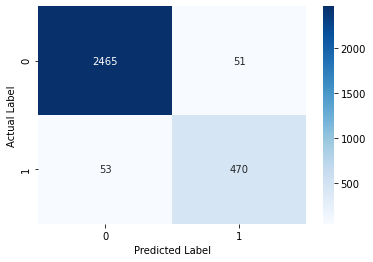

In [272]:
gsearch.fit(x_train_res,y_train_res)
print("BEST PARAMS", gsearch.best_params_)

training_accuracy = gsearch.score(x_train_res,y_train_res)
test_accuracy = gsearch.score(x_test, y_test)
print("Accuracy on training data: {:0.2f}".format(training_accuracy))
print("Accuracy on test data:     {:0.2f}".format(test_accuracy))

y_pred = gsearch.predict(x_test)
pl = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(pl, annot=True, fmt='', cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
print(classification_report(y_test,y_pred))

**Xboost with best parameters**

In [294]:
model_XGB = XGBClassifier(objective='binary:logistic',learning_rate=0.05,n_estimators=150, max_depth= 7, colsample_bytree=1,reg_alpha=0.01)
model_XGB.fit(x_train_res, y_train_res)
y_pred_xgb = model_XGB.predict(x_test)

accuracy_level_xgb = accuracy_score(y_test,y_pred_xgb)
print(("Accuracy: %.3f%%") % (accuracy_level_xgb*100.0))

[10:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 96.578%


In [295]:
y_prob_xgb = model_XGB.predict_proba(x_test)[:,1]
fpr_xgb , tpr_xgb , thresholds = roc_curve(y_test,y_prob_xgb)
auc_xgb = roc_auc_score(y_test,y_pred_xgb)

In [296]:
#Updating the table with the best model results
result_df=result_df.append({'classifiers':'XGBoost','Accuracy': round(accuracy_level_xgb*100.0,2),
                                                                                'AUC':auc_xgb}, ignore_index=True)

**Displaying Important feature with XGB classifier**

30


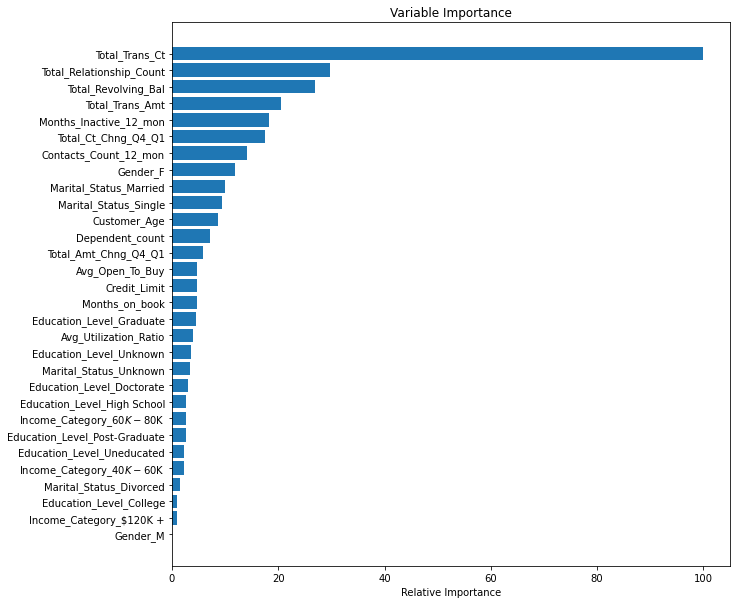

In [311]:
feature_importance = model_XGB.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**ROC Curve for all the models**

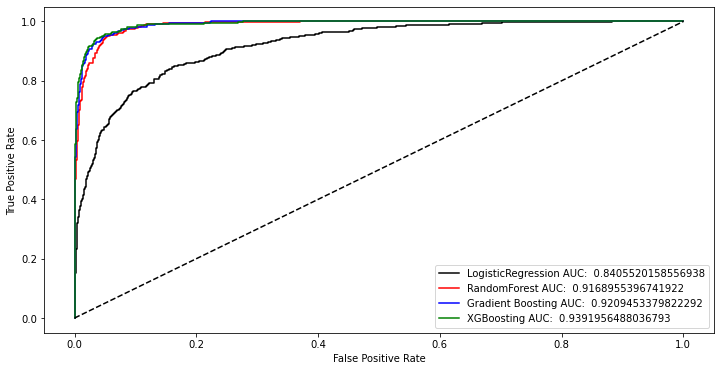

In [307]:
plt.figure(figsize = (12,6))

plt.plot(fpr_l, tpr_l, 'k',label= "LogisticRegression AUC:  "+str(auc_l))
plt.plot(fpr_rf, tpr_rf, 'r',label= "RandomForest AUC:  "+str(auc_rf))
plt.plot(fpr_gb, tpr_gb, 'b',label= "Gradient Boosting AUC:  "+str(auc_gb))
plt.plot(fpr_xgb, tpr_xgb, 'g',label= "XGBoosting AUC:  "+str(auc_xgb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.show()

**Final table with different model accuracy and AUC**

In [310]:
result_df

,classifiers,Accuracy,AUC
0,LogisticRegression,84.63,0.840552
1,RandomForest,95.39,0.916896
2,GradientBoosting,96.31,0.920945
3,XGBoost,96.58,0.939196


 The sklearn’s model selection package has GridSearchCV function for selecting best hyperparameters for model buliding. With the selected hyperparameters developed LogisticRegression, RF, Gradient Boosting and XGBoot models and compared accuracy/ Area under the curve score. XGBoost model has better performance for both accuracy and AUC score. Important features from the XGBoost are Total_trans_ct, Total_relationship_ct, total_revolving_balance and total_trans_amount. The Total_tran_ct was one of imporant fearture from all other other models as well.  If the customer has not trancranted in while with less total_trans_ct are more likely to chrun.